In [95]:
% matplotlib notebook
import pandas as pd
import numpy as N
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import datetime as dt

In [96]:
in_df = pd.read_csv("G:\\informatics\\hourly_obs_cleaned_1980_2009_v2.csv",na_values=" ")

In [97]:
# index dataframe for observations of [a] certain month(s)
dts = pd.to_datetime(in_df["Date"], format = '%Y%m%d')
in_df.index = dts

In [98]:
# make separate dfs for winter months
df_dec = in_df.iloc[(in_df.index.month ==12)]
df_jan = in_df.iloc[(in_df.index.month == 1)]
df_feb = in_df.iloc[(in_df.index.month == 2)]

In [99]:
# calculate average daily temperatures for each day using pandas groupby function
t_dec = df_dec['TEMP'].groupby(df_dec['Date']).mean()
t_jan = df_jan['TEMP'].groupby(df_jan['Date']).mean()
t_feb = df_feb['TEMP'].groupby(df_feb['Date']).mean()

<IPython.core.display.Javascript object>


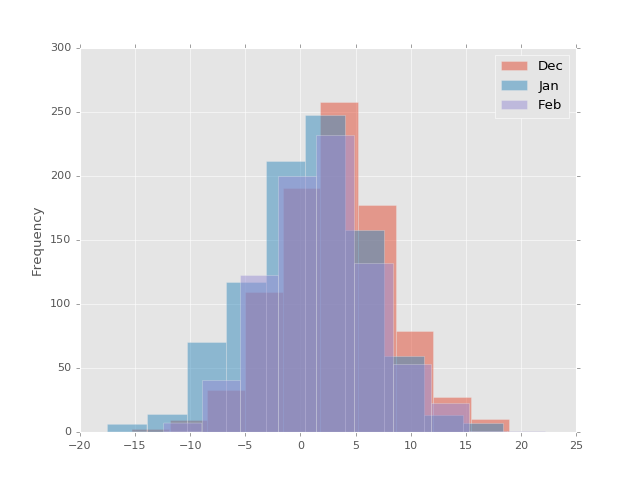

In [102]:
# distribution of mean daily temperatures by month
t_dec.plot.hist(alpha=0.5,legend=True,label='Dec')
t_jan.plot.hist(alpha=0.5,legend=True,label='Jan')
t_feb.plot.hist(alpha=0.5,legend=True,label='Feb')
plt.show()

<IPython.core.display.Javascript object>


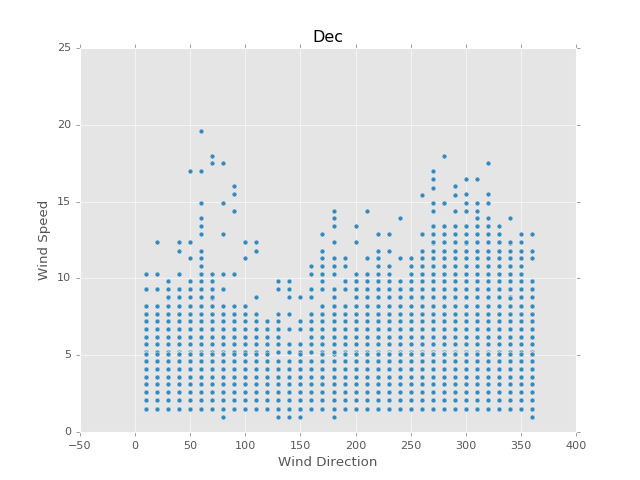

<IPython.core.display.Javascript object>


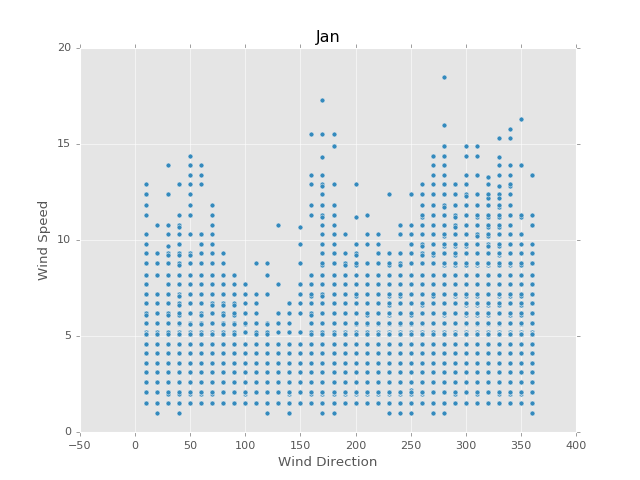

<IPython.core.display.Javascript object>


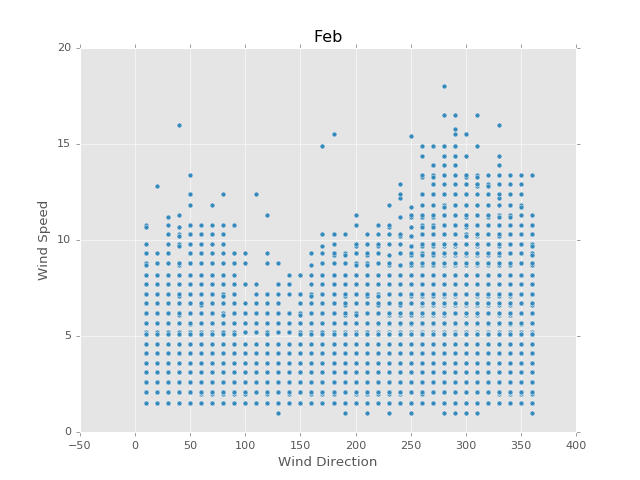

In [103]:
# plot wind speed as a function of wind direction
df_dec.plot.scatter(x='Wind Direction',y='Wind Speed',title='Dec')
df_jan.plot.scatter(x='Wind Direction',y='Wind Speed',title='Jan')
df_feb.plot.scatter(x='Wind Direction',y='Wind Speed',title='Feb')

<IPython.core.display.Javascript object>


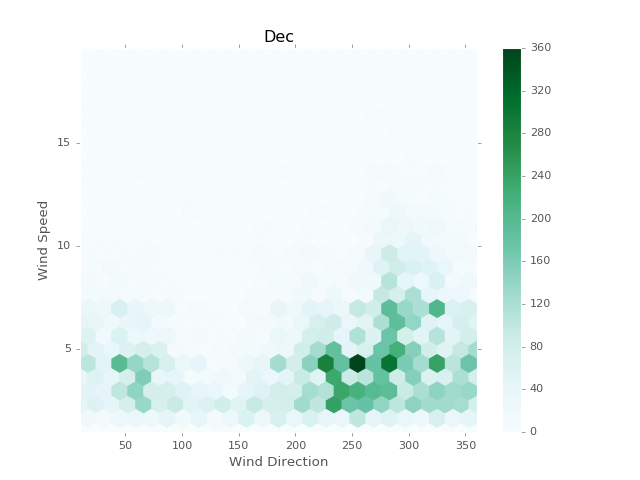

<IPython.core.display.Javascript object>


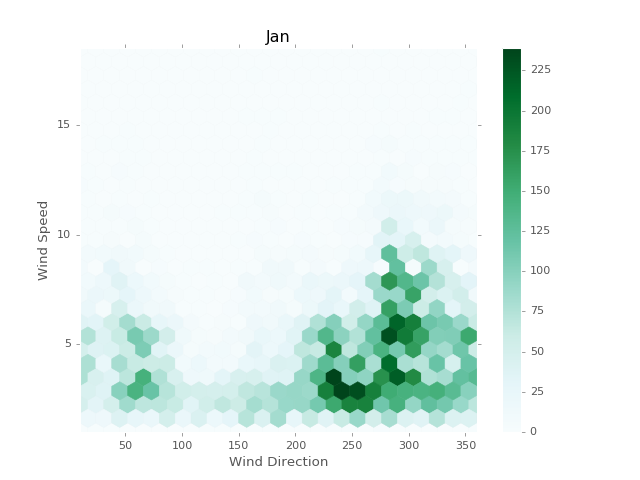

<IPython.core.display.Javascript object>


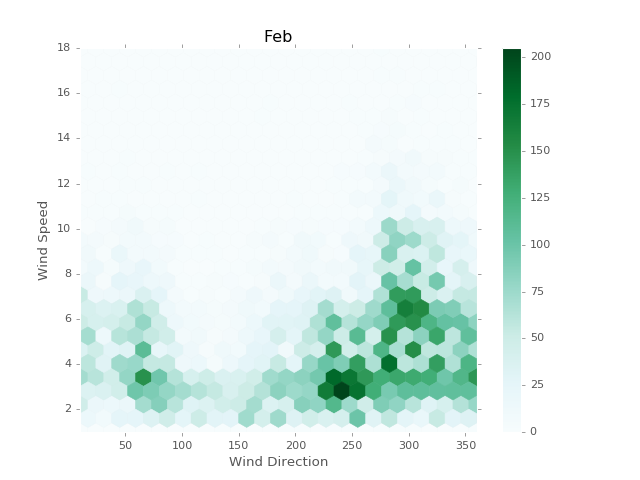

In [105]:
# re-plot wind scatter plots as hex-bin plots to account for data density, since hourly measurements are used
df_dec.plot.hexbin(x='Wind Direction',y='Wind Speed',gridsize=25,title='Dec')
df_jan.plot.hexbin(x='Wind Direction',y='Wind Speed',gridsize=25,title='Jan')
df_feb.plot.hexbin(x='Wind Direction',y='Wind Speed',gridsize=25,title='Feb')

<IPython.core.display.Javascript object>


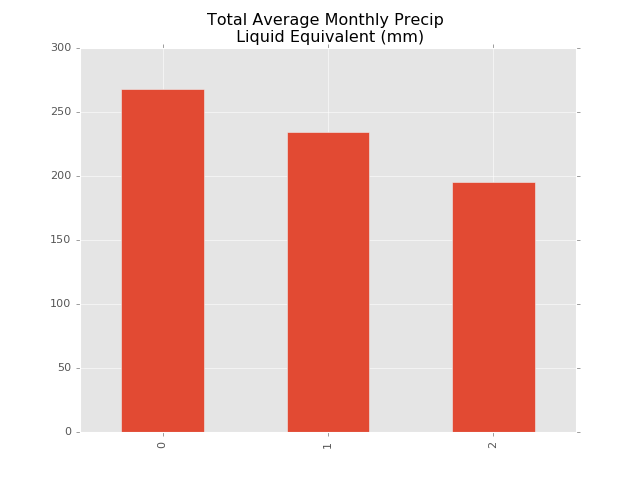

In [106]:
prec_dec = N.array((df_dec['liq precip amt #1'].sum())/30)
prec_jan = N.array((df_jan['liq precip amt #1'].sum())/30)
prec_feb = N.array((df_feb['liq precip amt #1'].sum())/30)

prec = pd.DataFrame([prec_dec,prec_jan,prec_feb],columns= ['Total Avg Precip'])
prec.plot.bar(legend=False, title='Total Average Monthly Precip \n Liquid Equivalent (mm)')